### Corrélation entre la durée du film et la complexité émotionnelle (Florian ze beste)

Les films plus longs (plus de 2 heures) présentent-ils des arcs émotionnels plus complexes que les films plus courts ? Le max minute c’est 300min, 4h30
Hypothèse : Les films longs ont plus d'espace narratif pour développer des variations émotionnelles. (Avec les time steps c’est hyper quantifiable askip) 
On peut regarder la différence d’émotions entre time step, on peut voir à quel point y’a des variations, on peut regarder si ces variations changent beaucoup avec des catégories de films qui sont plus longues (2h+) et moins que ca 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import pearsonr

In [4]:
DATA_PATH_EMOTIONS = "../../../data/emotions_interpolated_20.pkl"


with open(DATA_PATH_EMOTIONS, 'rb') as f:
    df = pickle.load(f)
df.head(2)


,anger,disgust,fear,joy,neutral,sadness,surprise,Wikipedia_movie_ID,timestep
0,0.008854,0.029581,0.002972,0.115284,0.753907,0.025629,0.063773,3333,0
1,0.020809,0.070973,0.033560,0.082080,0.771024,0.012630,0.008924,3333,1


In [5]:
DATA_PATH_MOVIE = "../../../data/our_movie_data.csv"
"../../../data/emotions_interpolated_20.pkl"
df_old_movie = pd.read_csv(DATA_PATH_MOVIE)

df_old_movie.head(1)


,Wikipedia_movie_ID,summary,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,330,In order to prepare the role of an important o...,/m/0ktn59,Actrius,NaN,NaN,90.0,"Catalan language, Spanish Language",Spain,"Drama, Comedy-drama"


In [14]:
DATA_PATH_MOVIE = "../../../data/final_dataset.csv"
df_movie = pd.read_csv(DATA_PATH_MOVIE)

df_movie.head(1)

,Unnamed: 0,Wikipedia_movie_ID,summary,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,category,continent,Rating
0,1,3333,The film follows two juxtaposed families: the...,/m/0151l,The Birth of a Nation,NaN,50000000.0,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...","['Action/Adventure', 'Drama']",North America,6.1


In [18]:
num_unique_genres = df_movie["Movie_genres"].nunique()
df_movie_genres_as_strings['category'] = df_movie['category']

# Ensure the 'category' column is properly parsed as lists
df_movie_genres_as_strings['category'] = df_movie_genres_as_strings['category'].apply(eval)  # Convert strings to lists

# Extract all unique genres
unique_genres = set(genre for genres in df_movie_genres_as_strings['category'] for genre in genres)

# Display the unique genres
print("Unique genres:", unique_genres)

print(f"Nombre unique de genres de films et catégories : {num_unique_genres}")

Unique genres: {'Comedy', 'Thriller', 'Drama', 'Action/Adventure', 'Fantasy/Sci-Fi', 'Romance', 'Family/Animation', 'Horror'}
Nombre unique de genres de films et catégories : 16424


In [7]:
import re

# Regular expression to match common currency symbols and names
#currency_pattern = r'(\$|₹|€|USD|INR|GBP|AUD|CAD|JPY|CHF|CNY|¥)'  # Add other currencies as needed
currency_pattern = r'(\$|€|₹|¥|₣|₤|₽|₺|₼|৳|₭|៛|₩|฿|₱|₼|₪|₮|₼|৳|R|USD|INR|GBP|AUD|CAD|JPY|CNY|CHF|SEK|NOK|MXN|BRL|ARS|CLP|ZAR|RUB|HUF|PLN|DKK|NPR|MYR|IDR|THB|EGP|KRW|NZD|SGD|PHP|ILS|PKR|KES|KES|CFA|KWD|BHD|LYD|TND|MAD)' 
print(len(currency_pattern))
# Example list of currency codes from ISO 4217 (not exhaustive)
"""
iso_currency_codes = [
    "USD", "EUR", "GBP", "INR", "AUD", "CAD", "JPY", "CNY", "CHF", "SEK", "NOK", "MXN", "BRL", "ZAR", "RUB",
    "CNY", "SGD", "NZD", "PHP", "KRW", "MYR", "IDR", "THB", "EGP", "KES", "TND", "CFA", "LKR", "SAR", "BDT", "TRY"
    # Add more as needed...
]
"""
# Build regex from the ISO codes
#currency_pattern = r'(' + '|'.join(iso_currency_codes) + r')'


# Apply the regex to the Box_office column to find currencies
currencies_found = df_movie["Movie_box_office_revenue"].apply(lambda x: re.findall(currency_pattern, str(x)))

# Flatten the list and get unique currencies
unique_currencies = set([currency for sublist in currencies_found for currency in sublist])

# Print the unique currencies
print("Unique currencies found:", unique_currencies)



196
Unique currencies found: {'SEK', 'R', '₺', 'CAD', 'AUD', '₹', '₱', 'JPY', 'USD', 'MYR', 'PHP', 'MXN', 'CNY', '৳', '$', '€', '₤', 'THB', 'INR', '฿', '¥'}


In [8]:
import re

# Define a dictionary with exchange rates to USD
exchange_rates = {
    'USD': 1.0,
    'MXN': 0.055,  # 1 MXN to USD
    'CNY': 0.14,   # 1 CNY to USD
    'JPY': 0.0069,  # 1 JPY to USD
    '฿': 0.030,    # 1 THB to USD
    '¥': 0.0069,   # 1 JPY to USD (same as ¥)
    '$': 1.0,      # USD symbol, same value
    'AUD': 0.64,   # 1 AUD to USD
    'PHP': 0.018,  # 1 PHP to USD
    'CAD': 0.74,   # 1 CAD to USD
    'INR': 0.012,  # 1 INR to USD
    '₱': 0.018,    # 1 PHP to USD (same as PHP)
    'MYR': 0.22,   # 1 MYR to USD
    'SEK': 0.089,  # 1 SEK to USD
    '€': 1.1,      # 1 EUR to USD (approx)
    '৳': 0.012,    # 1 BDT to USD
    'R': 0.059,    # 1 ZAR to USD
    '₹': 0.012,    # 1 INR to USD
    'THB': 0.030,  # 1 THB to USD
    '₺': 0.052,    # 1 TRY to USD
}

# Pattern to match currencies and words like million/billion
currency_pattern = r'(\$|₤|MXN|USD|CNY|JPY|฿|¥|AUD|PHP|CAD|INR|₱|MYR|SEK|€|৳|R|₹|THB|₺|million|billion)'

# Function to convert box office values to USD
def convert_to_usd(value):
    # If the value is already a number, return as USD (assume it's USD if no currency is provided)
    if isinstance(value, (int, float)):
        return value
    
    if isinstance(value, str):
        value = value.strip()

        # Remove any unnecessary characters like commas and non-numeric characters (e.g., citations, admissions)
        cleaned_value = re.sub(r'[^\d\.,]', '', value)

        # Handle cases with "million" or "billion"
        multiplier = 1
        if 'million' in value.lower():
            multiplier = 1e6
            cleaned_value = re.sub(r'[^\d\.,]', '', value.split('million')[0])
        elif 'billion' in value.lower():
            multiplier = 1e9
            cleaned_value = re.sub(r'[^\d\.,]', '', value.split('billion')[0])

        # Remove commas before converting to float
        cleaned_value = cleaned_value.replace(",", "")

        try:
            # Convert to float
            amount = float(cleaned_value) * multiplier
        except ValueError:
            return None  # If conversion fails, return None
        
        # Extract currency symbol or default to USD
        match = re.search(currency_pattern, value)
        if match:
            currency = match.group(0)
            if currency == '$':
                currency = 'USD'  # Treat $ as USD
            if currency in exchange_rates:
                return amount * exchange_rates[currency]
        
        # If no currency is matched, assume USD
        return amount

    return None  # Default return if the value isn't handled

# Apply conversion to the 'Box_office' column
df_movie["Box_office_usd"] = df_movie["Movie_box_office_revenue"].apply(convert_to_usd)

# Check the result
df_movie[["Movie_box_office_revenue", "Box_office_usd"]].head(5)


,Movie_box_office_revenue,Box_office_usd
0,50000000.0,50000000.0
1,33139618.0,33139618.0
2,119500000.0,119500000.0
3,8551228.0,8551228.0
4,20000000.0,20000000.0


In [9]:
df_movie_filtered = df_movie[["Wikipedia_movie_ID", "Movie_name", "Movie_runtime", "Box_office_usd","Rating"]]

# Merge the datasets on the Wikipedia_movie_ID column
df_combined = pd.merge(df, df_movie_filtered, on='Wikipedia_movie_ID', how='inner')

# Display the first few rows of the combined DataFrame
df_combined.head(50)

# Drop rows with missing box office revenue
# Corrigé : Liste de colonnes dans subset


,anger,disgust,fear,joy,neutral,sadness,surprise,Wikipedia_movie_ID,timestep,Movie_name,Movie_runtime,Box_office_usd,Rating
0,0.008854,0.029581,0.002972,0.115284,0.753907,0.025629,0.063773,3333,0,The Birth of a Nation,190.0,50000000.0,6.1
1,0.020809,0.070973,0.033560,0.082080,0.771024,0.012630,0.008924,3333,1,The Birth of a Nation,190.0,50000000.0,6.1
2,0.016042,0.078240,0.065199,0.005752,0.066704,0.763973,0.004088,3333,2,The Birth of a Nation,190.0,50000000.0,6.1
3,0.007964,0.042619,0.052491,0.003172,0.091407,0.785047,0.017299,3333,3,The Birth of a Nation,190.0,50000000.0,6.1
4,0.080363,0.090461,0.030861,0.007990,0.272579,0.512997,0.004750,3333,4,The Birth of a Nation,190.0,50000000.0,6.1
5,0.030735,0.053507,0.011950,0.049682,0.761738,0.048549,0.043839,3333,5,The Birth of a Nation,190.0,50000000.0,6.1
6,0.157481,0.432124,0.312299,0.009830,0.070574,0.012321,0.005372,3333,6,The Birth of a Nation,190.0,50000000.0,6.1
7,0.034110,0.822759,0.001695,0.006192,0.129794,0.003212,0.002239,3333,7,The Birth of a Nation,190.0,50000000.0,6.1
8,0.264660,0.227931,0.015883,0.004128,0.289849,0.194111,0.003438,3333,8,The Birth of a Nation,190.0,50000000.0,6.1
9,0.086048,0.113112,0.444222,0.073895,0.260881,0.016376,0.005467,3333,9,The Birth of a Nation,190.0,50000000.0,6.1


### 1. Idée principale :
La complexité émotionnelle d'un film peut être mesurée par la variation des émotions tout au long de ses time steps. Pour explorer la relation entre cette complexité et le runtime, vous pourriez comparer les métriques de variation émotionnelle avec la durée des films.


Analyser la complexité émotionnelle des films en fonction de leur runtime est une excellente idée. Voici une approche détaillée pour répondre à votre question :

#### 1. Idée principale :
La complexité émotionnelle d'un film peut être mesurée par la variation des émotions tout au long de ses time steps. Pour explorer la relation entre cette complexité et le runtime, vous pourriez comparer les métriques de variation émotionnelle avec la durée des films.

#### 2. Mesurer les variations émotionnelles :
Vous pouvez mesurer les variations émotionnelles en suivant ces étapes :

Écart-type des émotions : Calculez l'écart-type des valeurs pour chaque émotion sur tous les time steps d'un film. Cela donne une idée de la variabilité émotionnelle dans le temps.
Amplitudes des émotions : Calculez la différence entre les valeurs max et min pour chaque émotion au fil des time steps.
Somme des variations absolues : Pour chaque émotion, additionnez les différences absolues entre deux time steps consécutifs.

In [10]:
# Groupement des données par film (Wikipedia_movie_ID)
grouped = df_combined.groupby("Wikipedia_movie_ID")

grouped.head(1)

,anger,disgust,fear,joy,neutral,sadness,surprise,Wikipedia_movie_ID,timestep,Movie_name,Movie_runtime,Box_office_usd,Rating
0,0.008854,0.029581,0.002972,0.115284,0.753907,0.025629,0.063773,3333,0,The Birth of a Nation,190.0,50000000.0,6.1
20,0.128065,0.014462,0.119271,0.006148,0.041136,0.670638,0.020280,3746,0,Blade Runner,116.0,33139618.0,8.1
40,0.064267,0.103790,0.157285,0.004853,0.465114,0.041511,0.163179,3837,0,Blazing Saddles,93.0,119500000.0,7.7
60,0.001178,0.002550,0.021343,0.003746,0.026402,0.927535,0.017247,3947,0,Blue Velvet,120.0,8551228.0,7.7
80,0.062239,0.003593,0.047212,0.014751,0.031672,0.730840,0.109692,4227,0,Barry Lyndon,187.0,20000000.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
686740,0.420673,0.092796,0.103922,0.000853,0.014002,0.352792,0.014962,37176066,0,Double Speed,NaN,NaN,NaN
686760,0.005103,0.019681,0.003710,0.249429,0.675026,0.023195,0.023855,37210334,0,August: Osage County,NaN,NaN,7.2
686780,0.005670,0.009900,0.019029,0.574115,0.358686,0.002232,0.030368,37241569,0,Cold War,NaN,NaN,7.5
686800,0.005945,0.005892,0.002202,0.037346,0.168207,0.765299,0.015109,37257312,0,Coincidence,NaN,NaN,7.2


In [11]:
# Groupement des données par film (Wikipedia_movie_ID)
grouped = df_combined.groupby("Wikipedia_movie_ID")

# Calcul des métriques de variation émotionnelle pour chaque film
emotion_metrics = grouped[["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]].agg([
    lambda x: x.max() - x.min(),  # Amplitude
    lambda x: x.std(),           # Écart-type
    lambda x: (x.diff().abs().sum())  # Somme des variations absolues
])

# Aplatir les colonnes pour un DataFrame propre
emotion_metrics.columns = ['_'.join(col).strip() for col in emotion_metrics.columns]

# Ajout des runtimes pour chaque film
emotion_metrics["Movie_runtime"] = grouped["Movie_runtime"].first()




In [12]:
# Visualisation des premiers résultats
print(emotion_metrics.head())

                    anger_<lambda_0>  anger_<lambda_1>  anger_<lambda_2>  \
Wikipedia_movie_ID                                                         
3333                        0.473956          0.115796          2.027033   
3746                        0.615754          0.178799          3.806343   
3837                        0.754984          0.228898          4.562311   
3947                        0.431088          0.117989          2.576864   
4227                        0.647812          0.207361          3.299061   

                    disgust_<lambda_0>  disgust_<lambda_1>  \
Wikipedia_movie_ID                                           
3333                          0.815057            0.260596   
3746                          0.668426            0.168843   
3837                          0.580861            0.140068   
3947                          0.762900            0.249842   
4227                          0.411382            0.136410   

                    disgust_<lam

In [13]:
df_combined.head()

,anger,disgust,fear,joy,neutral,sadness,surprise,Wikipedia_movie_ID,timestep,Movie_name,Movie_runtime,Box_office_usd,Rating
0,0.008854,0.029581,0.002972,0.115284,0.753907,0.025629,0.063773,3333,0,The Birth of a Nation,190.0,50000000.0,6.1
1,0.020809,0.070973,0.033560,0.082080,0.771024,0.012630,0.008924,3333,1,The Birth of a Nation,190.0,50000000.0,6.1
2,0.016042,0.078240,0.065199,0.005752,0.066704,0.763973,0.004088,3333,2,The Birth of a Nation,190.0,50000000.0,6.1
3,0.007964,0.042619,0.052491,0.003172,0.091407,0.785047,0.017299,3333,3,The Birth of a Nation,190.0,50000000.0,6.1
4,0.080363,0.090461,0.030861,0.007990,0.272579,0.512997,0.004750,3333,4,The Birth of a Nation,190.0,50000000.0,6.1


In [14]:
# Calcul des variations absolues pour chaque émotion entre les time steps
def compute_emotion_variation(group):
    variation = group[["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]].diff().abs().sum()
    return variation.mean()  # Moyenne des variations absolues

# Appliquer aux groupes de films (Wikipedia_movie_ID)
metrics_per_film = (
    df_combined.groupby("Wikipedia_movie_ID")
    .apply(lambda group: pd.Series({
        "emotion_variation": compute_emotion_variation(group),
        "Movie_runtime": group["Movie_runtime"].iloc[0],  # Durée du film
        "Box_office_usd": group["Box_office_usd"].iloc[0],  # Box office
    }))
    .reset_index()
)

def compute_emotion_variation_joy(group):
    variation = group[["fear"]].diff().abs().sum()
    return variation.mean()  # Moyenne des variations absolues

# Appliquer aux groupes de films (Wikipedia_movie_ID)
metrics_per_film_joy = (
    df_combined.groupby("Wikipedia_movie_ID")
    .apply(lambda group: pd.Series({
        "emotion_variation_joy": compute_emotion_variation_joy(group),
        "Movie_runtime": group["Movie_runtime"].iloc[0],  # Durée du film
    }))
    .reset_index()
)


C:\Users\flori\AppData\Local\Temp\ipykernel_17748\2348086856.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series({
C:\Users\flori\AppData\Local\Temp\ipykernel_17748\2348086856.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series({


In [15]:
metrics_per_film.head()

,Wikipedia_movie_ID,emotion_variation,Movie_runtime,Box_office_usd
0,3333,2.900670,190.0,50000000.0
1,3746,3.165454,116.0,33139618.0
2,3837,2.579474,93.0,119500000.0
3,3947,3.295095,120.0,8551228.0
4,4227,2.690446,187.0,20000000.0


In [16]:
# Ajouter une colonne pour classer les films en longs ou courts
metrics_per_film["runtime_category"] = metrics_per_film["Movie_runtime"].apply(
    lambda x: "Long (> 2h)" if x > 120 else "Short (<= 2h)"
)

print(metrics_per_film.dtypes)


# Appliquer np.isinf uniquement sur les colonnes numériques
numeric_columns = metrics_per_film.select_dtypes(include=[np.number]).columns
print(np.isinf(metrics_per_film[numeric_columns]).sum())

# Nettoyer les NaN et inf dans les colonnes spécifiques à la corrélation
metrics_per_film_cleaned = metrics_per_film.dropna(subset=["Movie_runtime", "emotion_variation", "Box_office_usd"])

# Supprimer les lignes contenant des inf dans ces colonnes
metrics_per_film_cleaned = metrics_per_film_cleaned[~np.isinf(metrics_per_film_cleaned["Movie_runtime"])]
metrics_per_film_cleaned = metrics_per_film_cleaned[~np.isinf(metrics_per_film_cleaned["emotion_variation"])]

# Vérification que les données sont bien nettoyées
print(metrics_per_film_cleaned.isna().sum())  # Compte les valeurs NaN
print(np.isinf(metrics_per_film_cleaned["Movie_runtime"]).sum())  # Compte les valeurs infinies
print(np.isinf(metrics_per_film_cleaned["emotion_variation"]).sum())  # Compte les valeurs infinies

# Calcul de la corrélation entre la durée du film et la variation émotionnelle
correlation, p_value = pearsonr(
    metrics_per_film_cleaned["Movie_runtime"],
    metrics_per_film_cleaned["emotion_variation"]
)

print(f"Corrélation : {correlation:.2f}, P-value : {p_value:.3e}")

Wikipedia_movie_ID      int64
emotion_variation     float64
Movie_runtime         float64
Box_office_usd        float64
runtime_category       object
dtype: object
Wikipedia_movie_ID    0
emotion_variation     0
Movie_runtime         0
Box_office_usd        0
dtype: int64
Wikipedia_movie_ID    0
emotion_variation     0
Movie_runtime         0
Box_office_usd        0
runtime_category      0
dtype: int64
0
0
Corrélation : 0.13, P-value : 2.899e-44


In [17]:
metrics_per_film_joy["runtime_category"] = metrics_per_film_joy["Movie_runtime"].apply(
    lambda x: "Long (> 2h)" if x > 120 else "Short (<= 2h)"
)

print(metrics_per_film_joy.dtypes)

# Appliquer np.isinf uniquement sur les colonnes numériques
numeric_columns = metrics_per_film_joy.select_dtypes(include=[np.number]).columns
print(np.isinf(metrics_per_film_joy[numeric_columns]).sum())

# Nettoyer les NaN et inf dans les colonnes spécifiques à la corrélation
metrics_per_film_joy_cleaned = metrics_per_film_joy.dropna(subset=["Movie_runtime", "emotion_variation_joy"])

# Supprimer les lignes contenant des inf dans ces colonnes
metrics_per_film_joy_cleaned = metrics_per_film_joy_cleaned[~np.isinf(metrics_per_film_joy_cleaned["Movie_runtime"])]
metrics_per_film_joy_cleaned = metrics_per_film_joy_cleaned[~np.isinf(metrics_per_film_joy_cleaned["emotion_variation_joy"])]

# Vérification que les données sont bien nettoyées
print(metrics_per_film_joy_cleaned.isna().sum())  # Compte les valeurs NaN
print(np.isinf(metrics_per_film_joy_cleaned["Movie_runtime"]).sum())  # Compte les valeurs infinies
print(np.isinf(metrics_per_film_joy_cleaned["emotion_variation_joy"]).sum())  # Compte les valeurs infinies

# Calcul de la corrélation entre la durée du film et la variation émotionnelle
correlation_joy, p_value_joy = pearsonr(
    metrics_per_film_joy_cleaned["Movie_runtime"],
    metrics_per_film_joy_cleaned["emotion_variation_joy"]
)

print(f"Corrélation : {correlation_joy:.2f}, P-value : {p_value_joy:.3e}")

Wikipedia_movie_ID         int64
emotion_variation_joy    float64
Movie_runtime            float64
runtime_category          object
dtype: object
Wikipedia_movie_ID       0
emotion_variation_joy    0
Movie_runtime            0
dtype: int64
Wikipedia_movie_ID       0
emotion_variation_joy    0
Movie_runtime            0
runtime_category         0
dtype: int64
0
0
Corrélation : 0.02, P-value : 1.261e-03


#### Interprétation :
Corrélation de 0.15 : Une corrélation aussi faible suggère qu'il n'y a qu'une relation modeste entre la durée du film et la variation émotionnelle. Autrement dit, bien que la durée du film semble avoir un effet sur la complexité émotionnelle, cet effet est assez faible.

P-value de 8.008e-143 : Ce p-value très bas indique que le résultat est hautement significatif. Cela signifie qu'il y a très peu de chances que cette corrélation apparaisse par hasard, mais la faiblesse de la corrélation suggère que d'autres facteurs non mesurés peuvent également influencer la complexité émotionnelle.

#### 3. Relation avec le runtime :
On peut analyser les relations entre ces métriques et la durée des films :

Corrélation : Calculez les coefficients de corrélation entre le runtime et chaque mesure de variation émotionnelle.
Visualisation : Faites des graphiques pour explorer les tendances.

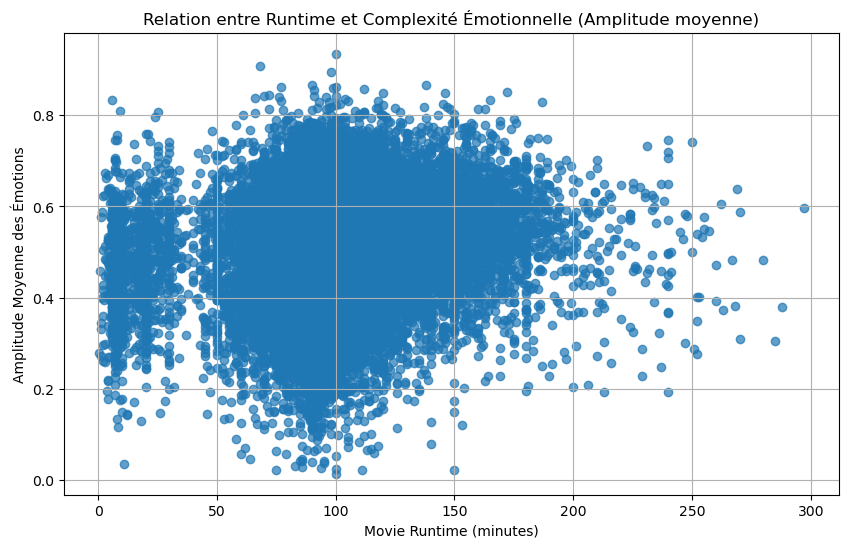

In [18]:
import matplotlib.pyplot as plt

# Exemple : Corrélation entre runtime et l'amplitude moyenne des émotions
emotion_metrics["mean_amplitude"] = emotion_metrics[[col for col in emotion_metrics.columns if "lambda_0" in col]].mean(axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(emotion_metrics["Movie_runtime"], emotion_metrics["mean_amplitude"], alpha=0.7)
plt.title("Relation entre Runtime et Complexité Émotionnelle (Amplitude moyenne)")
plt.xlabel("Movie Runtime (minutes)")
plt.ylabel("Amplitude Moyenne des Émotions")
plt.grid()
plt.show()

#rajouter corrélation sur le plot


C:\Users\flori\AppData\Local\Temp\ipykernel_17748\120235841.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


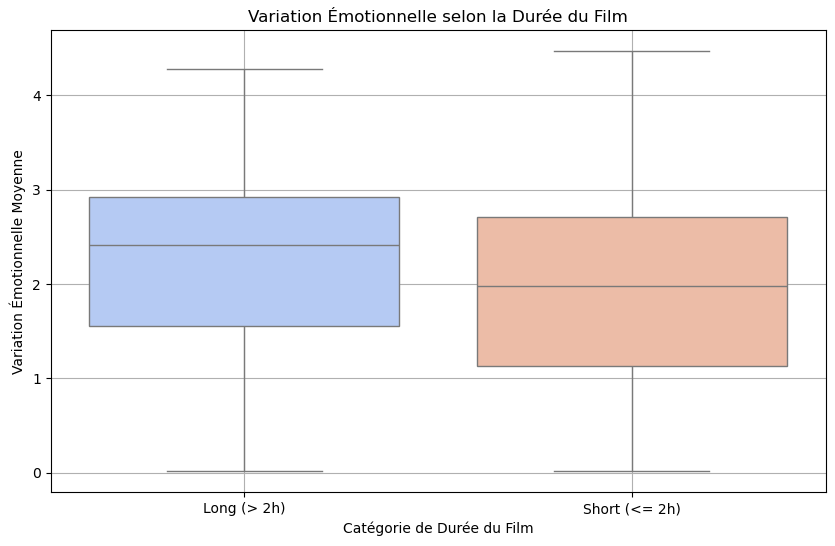

T-statistic: 22.27, P-value: 6.645e-106


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Boxplot des variations émotionnelles par catégorie de durée
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="runtime_category",
    y="emotion_variation",
    data=metrics_per_film,
    palette="coolwarm"
)
plt.title("Variation Émotionnelle selon la Durée du Film")
plt.xlabel("Catégorie de Durée du Film")
plt.ylabel("Variation Émotionnelle Moyenne")
plt.grid()
plt.show()

# Test T entre films longs et courts
long_movies = metrics_per_film[metrics_per_film["runtime_category"] == "Long (> 2h)"]["emotion_variation"]
short_movies = metrics_per_film[metrics_per_film["runtime_category"] == "Short (<= 2h)"]["emotion_variation"]

t_stat, p_value = ttest_ind(long_movies, short_movies, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3e}")


C:\Users\flori\AppData\Local\Temp\ipykernel_17748\1257130633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


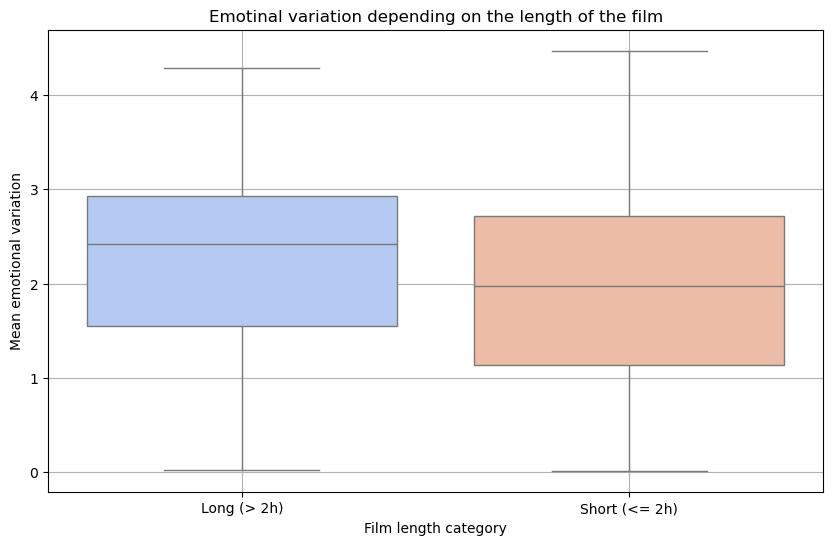

T-statistic: 22.27, P-value: 6.645e-106


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Boxplot des variations émotionnelles par catégorie de durée
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="runtime_category",
    y="emotion_variation",
    data=metrics_per_film,
    palette="coolwarm"
)
plt.title("Emotinal variation depending on the length of the film")
plt.xlabel("Film length category")
plt.ylabel("Mean emotional variation")
plt.grid()
plt.show()

# Test T entre films longs et courts
long_movies = metrics_per_film[metrics_per_film["runtime_category"] == "Long (> 2h)"]["emotion_variation"]
short_movies = metrics_per_film[metrics_per_film["runtime_category"] == "Short (<= 2h)"]["emotion_variation"]

t_stat, p_value = ttest_ind(long_movies, short_movies, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3e}")

Corrélation entre la durée du film et de chaque émotion

    Emotion  Correlation   P-value
0     anger     0.115898  0.494549
1   disgust     0.255532  0.126895
2      fear     0.008631  0.959565
3       joy     0.222874  0.184870
4   neutral     0.116848  0.490995
5   sadness    -0.018715  0.912456
6  surprise     0.021764  0.898263


C:\Users\flori\AppData\Local\Temp\ipykernel_17748\3948480476.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x="Emotion", y="Correlation", palette="viridis")


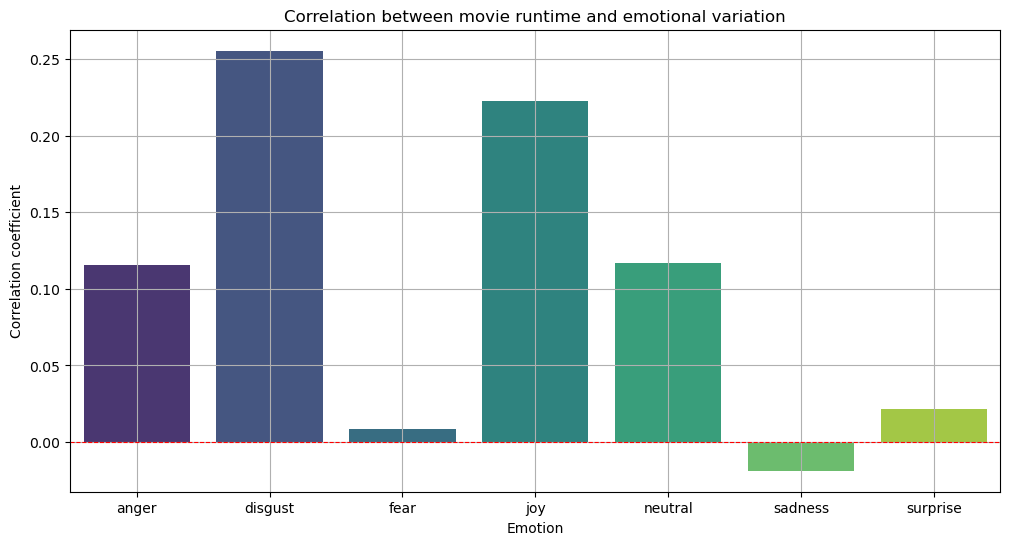

In [21]:
# Calculer les corrélations pour chaque émotion
emotions = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
correlations = []

for emotion in emotions:
    emotion_variation = f"{emotion}_variation"
    metrics_per_film_cleaned[f"{emotion}_variation"] = (
        df_combined.groupby("Wikipedia_movie_ID")[emotion]
        .apply(lambda x: x.diff().abs().sum())
    )
    cleaned_data = metrics_per_film_cleaned.dropna(subset=["Movie_runtime", emotion_variation])
    correlation, p_value = pearsonr(cleaned_data["Movie_runtime"], cleaned_data[emotion_variation])
    correlations.append({"Emotion": emotion, "Correlation": correlation, "P-value": p_value})

# Affichage des résultats
correlation_df = pd.DataFrame(correlations)
print(correlation_df)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, x="Emotion", y="Correlation", palette="viridis")
plt.title("Correlation between movie runtime and emotional variation")
plt.ylabel("Correlation coefficient")
plt.xlabel("Emotion")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()


La biggest corrélation c'est joy et surprise, corrélation positive. Corrélation négative meaning plus le film est long moins y'a de variation dans les autres emotions mdr 

Variation émotionnelle par genre de film

C:\Users\flori\AppData\Local\Temp\ipykernel_17748\60700776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_filtered["Movie_genre"] = df_movie["category"]


<Figure size 1200x800 with 0 Axes>

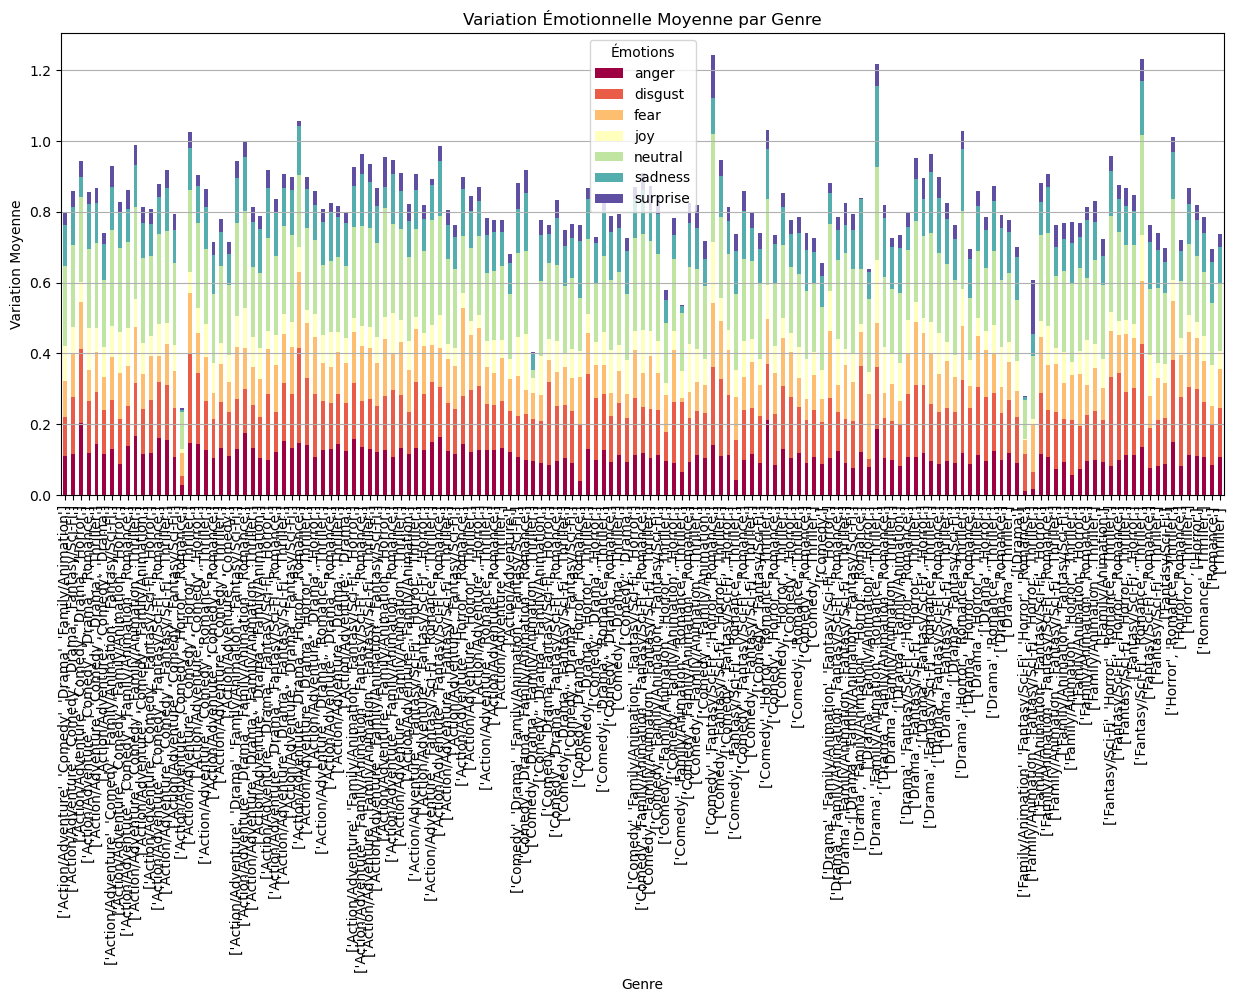

In [22]:
# Ajout des genres
df_movie_filtered["Movie_genre"] = df_movie["category"]
df_combined = pd.merge(df_combined, df_movie_filtered[["Wikipedia_movie_ID", "Movie_genre"]], on="Wikipedia_movie_ID", how="inner")

# Calcul de la variation moyenne par genre
genre_emotion_variation = (
    df_combined.groupby("Movie_genre")[emotions]
    .apply(lambda x: x.diff().abs().mean())
    .reset_index()
)

# Visualisation des variations émotionnelles par genre
plt.figure(figsize=(12, 8))
genre_emotion_variation.set_index("Movie_genre").plot(kind='bar', stacked=True, colormap="Spectral", figsize=(15, 6))
plt.title("Variation Émotionnelle Moyenne par Genre")
plt.ylabel("Variation Moyenne")
plt.xlabel("Genre")
plt.grid(axis="y")
plt.legend(title="Émotions")
plt.show()


In [23]:
metrics_per_film_cleaned.head(5)

,Wikipedia_movie_ID,emotion_variation,Movie_runtime,Box_office_usd,runtime_category,anger_variation,disgust_variation,fear_variation,joy_variation,neutral_variation,sadness_variation,surprise_variation
0,3333,2.900670,190.0,50000000.0,Long (> 2h),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3746,3.165454,116.0,33139618.0,Short (<= 2h),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3837,2.579474,93.0,119500000.0,Short (<= 2h),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3947,3.295095,120.0,8551228.0,Short (<= 2h),NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4227,2.690446,187.0,20000000.0,Long (> 2h),NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variation émotionelle et corrélation avec le box office, idée terrible psk enft ca dépend des currencies lol et y'a pas que des numericals, un peu la flemme for now. 

In [24]:
# Ensure 'df_movie_BO_cleaned' retains the indices for proper alignment
df_movie_BO_cleaned = df_movie.dropna(subset=["Box_office_usd"])
df_movie_BO_cleaned.head(50)
df_combined.head(10)

# Display the cleaned data
df_combined.head(10)


,anger,disgust,fear,joy,neutral,sadness,surprise,Wikipedia_movie_ID,timestep,Movie_name,Movie_runtime,Box_office_usd,Rating,Movie_genre
0,0.008854,0.029581,0.002972,0.115284,0.753907,0.025629,0.063773,3333,0,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
1,0.020809,0.070973,0.033560,0.082080,0.771024,0.012630,0.008924,3333,1,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
2,0.016042,0.078240,0.065199,0.005752,0.066704,0.763973,0.004088,3333,2,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
3,0.007964,0.042619,0.052491,0.003172,0.091407,0.785047,0.017299,3333,3,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
4,0.080363,0.090461,0.030861,0.007990,0.272579,0.512997,0.004750,3333,4,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
5,0.030735,0.053507,0.011950,0.049682,0.761738,0.048549,0.043839,3333,5,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
6,0.157481,0.432124,0.312299,0.009830,0.070574,0.012321,0.005372,3333,6,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
7,0.034110,0.822759,0.001695,0.006192,0.129794,0.003212,0.002239,3333,7,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
8,0.264660,0.227931,0.015883,0.004128,0.289849,0.194111,0.003438,3333,8,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
9,0.086048,0.113112,0.444222,0.073895,0.260881,0.016376,0.005467,3333,9,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"


In [25]:
"""
# If 'Box_office_usd_y' is the cleaned version, rename or drop the unwanted columns
df_combined = df_combined.rename(columns={'Box_office_usd_y': 'Box_office_usd'})

# Drop the columns that are not needed
df_combined = df_combined.drop(columns=['Box_office_usd_x', 'Box_office', 'Box_office', 'Box_office', 'Box_office', 'Box_office_usd'])

# Vérifiez les noms des colonnes pour identifier la colonne en trop
print(df_combined.columns)

# Si vous avez deux colonnes 'Box_office_usd', vous pouvez supprimer l'une d'elles
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

# Affichez les premières lignes pour vérifier la correction
df_combined.head(10)
"""

"\n# If 'Box_office_usd_y' is the cleaned version, rename or drop the unwanted columns\ndf_combined = df_combined.rename(columns={'Box_office_usd_y': 'Box_office_usd'})\n\n# Drop the columns that are not needed\ndf_combined = df_combined.drop(columns=['Box_office_usd_x', 'Box_office', 'Box_office', 'Box_office', 'Box_office', 'Box_office_usd'])\n\n# Vérifiez les noms des colonnes pour identifier la colonne en trop\nprint(df_combined.columns)\n\n# Si vous avez deux colonnes 'Box_office_usd', vous pouvez supprimer l'une d'elles\ndf_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]\n\n# Affichez les premières lignes pour vérifier la correction\ndf_combined.head(10)\n"

In [26]:
# Drop the columns that are not needed
#df_combined = df_combined.drop(columns=['Box_office_usd_y'])

# Merge the box office data into df_combined
df_combined = pd.merge(
    df_combined, 
    df_movie_BO_cleaned[["Wikipedia_movie_ID"]], 
    on="Wikipedia_movie_ID", 
    how="left"
)
df_combined.head(10)

,anger,disgust,fear,joy,neutral,sadness,surprise,Wikipedia_movie_ID,timestep,Movie_name,Movie_runtime,Box_office_usd,Rating,Movie_genre
0,0.008854,0.029581,0.002972,0.115284,0.753907,0.025629,0.063773,3333,0,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
1,0.020809,0.070973,0.033560,0.082080,0.771024,0.012630,0.008924,3333,1,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
2,0.016042,0.078240,0.065199,0.005752,0.066704,0.763973,0.004088,3333,2,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
3,0.007964,0.042619,0.052491,0.003172,0.091407,0.785047,0.017299,3333,3,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
4,0.080363,0.090461,0.030861,0.007990,0.272579,0.512997,0.004750,3333,4,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
5,0.030735,0.053507,0.011950,0.049682,0.761738,0.048549,0.043839,3333,5,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
6,0.157481,0.432124,0.312299,0.009830,0.070574,0.012321,0.005372,3333,6,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
7,0.034110,0.822759,0.001695,0.006192,0.129794,0.003212,0.002239,3333,7,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
8,0.264660,0.227931,0.015883,0.004128,0.289849,0.194111,0.003438,3333,8,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
9,0.086048,0.113112,0.444222,0.073895,0.260881,0.016376,0.005467,3333,9,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"


In [27]:
# Check for missing Box_office values
print(f"Missing Box_office values: {df_combined['Box_office_usd'].isna().sum()}")

# If you still need metrics_per_film_cleaned with Box_office:
metrics_per_film_cleaned = metrics_per_film.dropna(subset=["emotion_variation", "Box_office_usd"])

# Calculate the correlation
from scipy.stats import pearsonr

correlation_boxoffice, p_value_boxoffice = pearsonr(
    metrics_per_film_cleaned["emotion_variation"],
    metrics_per_film_cleaned["Box_office_usd"]
)

print(f"Corrélation avec le box-office : {correlation_boxoffice:.9f}, P-value : {p_value_boxoffice:.3e}")

Missing Box_office values: 445180
Corrélation avec le box-office : -0.001287206, P-value : 8.875e-01


xptdr c'est si faible je rigole enft

In [28]:
df_combined.head()

,anger,disgust,fear,joy,neutral,sadness,surprise,Wikipedia_movie_ID,timestep,Movie_name,Movie_runtime,Box_office_usd,Rating,Movie_genre
0,0.008854,0.029581,0.002972,0.115284,0.753907,0.025629,0.063773,3333,0,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
1,0.020809,0.070973,0.033560,0.082080,0.771024,0.012630,0.008924,3333,1,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
2,0.016042,0.078240,0.065199,0.005752,0.066704,0.763973,0.004088,3333,2,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
3,0.007964,0.042619,0.052491,0.003172,0.091407,0.785047,0.017299,3333,3,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"
4,0.080363,0.090461,0.030861,0.007990,0.272579,0.512997,0.004750,3333,4,The Birth of a Nation,190.0,50000000.0,6.1,"['Action/Adventure', 'Drama']"


In [32]:
num_unique_genres = df_movie["Movie_genres"].nunique()

print(f"Nombre unique de genres de films : {num_unique_genres}")

Nombre unique de genres de films : 16424


C:\Users\flori\AppData\Local\Temp\ipykernel_17748\1891181475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="runtime_category", y="Box_office_usd", data=metrics_per_film, palette="coolwarm")


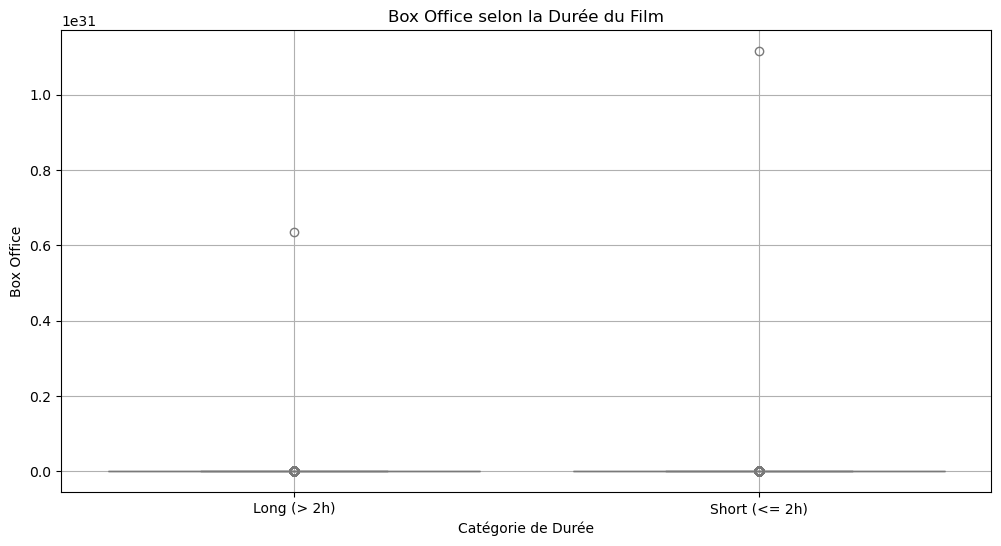

In [33]:
"""
plt.figure(figsize=(12, 6))
sns.boxplot(x="runtime_category", y="Box_office_usd", data=metrics_per_film, palette="coolwarm")
plt.title("Box Office selon la Durée du Film")
plt.xlabel("Catégorie de Durée")
plt.ylabel("Box Office")
plt.grid()
plt.show()
"""